# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

2025-05-12 16:12:14.334319: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 16:12:14.339619: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 16:12:14.356857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747066334.403773   23780 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747066334.412565   23780 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747066334.449943   23780 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,292.055389,294.872394,291.045139,293.279315,1963682
1,2010-01-05,292.133026,295.124883,290.073704,293.356975,2014488
2,2010-01-06,285.527771,292.269171,284.808958,292.133163,3349176
3,2010-01-07,277.581940,287.295753,276.260852,285.780389,6474892
4,2010-01-08,271.908997,279.174932,270.626778,278.203551,6048178


In [6]:
df = df.drop(columns=[col for col in ['Date', 'Adj Close'] if col in df.columns])
df.head()


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,292.055389,294.872394,291.045139,293.279315,1963682
1,292.133026,295.124883,290.073704,293.356975,2014488
2,285.527771,292.269171,284.808958,292.133163,3349176
3,277.581940,287.295753,276.260852,285.780389,6474892
4,271.908997,279.174932,270.626778,278.203551,6048178


Visualizing Closing Price

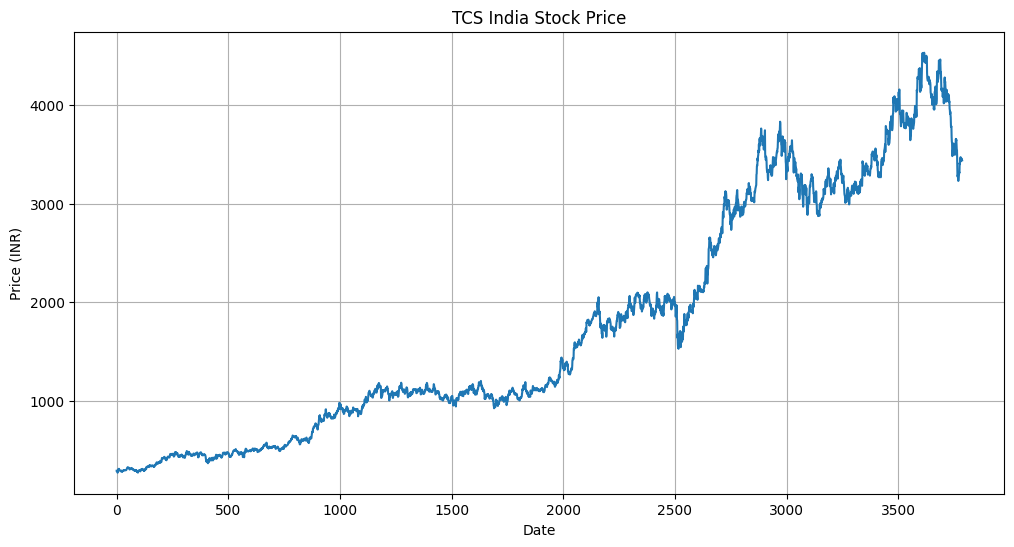

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [8]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,292.055389,294.872394,291.045139,293.279315,1963682
1,292.133026,295.124883,290.073704,293.356975,2014488
2,285.527771,292.269171,284.808958,292.133163,3349176
3,277.581940,287.295753,276.260852,285.780389,6474892
4,271.908997,279.174932,270.626778,278.203551,6048178
...,...,...,...,...,...
3782,3454.300049,3504.500000,3446.399902,3450.000000,1284443
3783,3460.000000,3473.000000,3437.000000,3460.000000,1324763
3784,3445.100098,3459.500000,3420.600098,3420.600098,1477128


# Plotting moving averages of 100 day

---



In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3782,3842.410115
3783,3832.660803
3784,3822.696150
3785,3812.965032


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

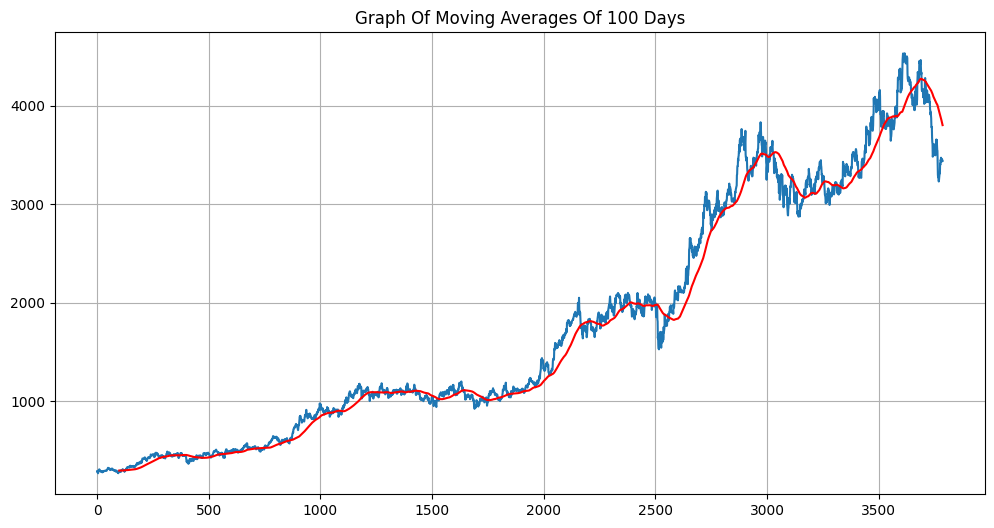

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3782,4050.348124
3783,4046.877140
3784,4043.404879
3785,4039.905697


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

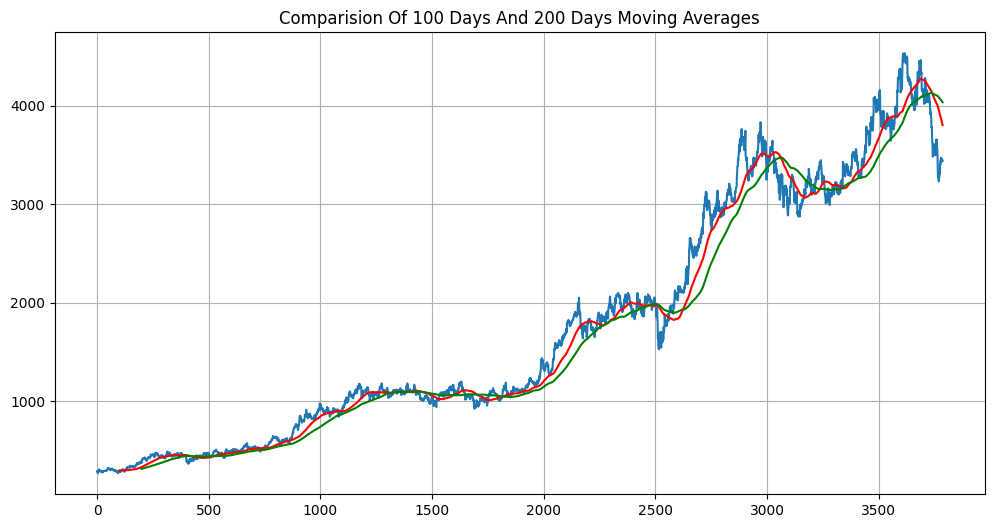

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [13]:
df.shape

(3787, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [14]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2650, 6)
(1137, 6)


In [15]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,292.055389,294.872394,291.045139,293.279315,1963682
1,2010-01-05,292.133026,295.124883,290.073704,293.356975,2014488
2,2010-01-06,285.527771,292.269171,284.808958,292.133163,3349176
3,2010-01-07,277.581940,287.295753,276.260852,285.780389,6474892
4,2010-01-08,271.908997,279.174932,270.626778,278.203551,6048178


In [16]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2650,2020-10-01,2369.878906,2385.421759,2340.624711,2357.247486,2610337
2651,2020-10-05,2541.131592,2562.074514,2444.634709,2460.553127,17412105
2652,2020-10-06,2549.114502,2569.493848,2488.821600,2569.493848,9846367
2653,2020-10-07,2569.447021,2601.424871,2538.502320,2575.128880,9656101
2654,2020-10-08,2653.734619,2709.425809,2629.598705,2629.598705,19839329


# Using MinMax scaler for normalization of the dataset

---



In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [19]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00947271],
       [0.00950998],
       [0.00892265],
       ...,
       [0.96845075],
       [0.96612951],
       [0.99053496]])

In [20]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [21]:
x_train.shape

(2550, 100, 1)

# ML Model (LSTM)

---



In [22]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

2025-05-12 16:13:53.890640: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/workspaces/Stock-Price-Prediction-using-LSTM/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [25]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 147ms/step - loss: 0.0802 - mean_absolute_error: 0.1946
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - loss: 0.0063 - mean_absolute_error: 0.0554
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - loss: 0.0055 - mean_absolute_error: 0.0501
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 149ms/step - loss: 0.0061 - mean_absolute_error: 0.0535
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - loss: 0.0049 - mean_absolute_error: 0.0468
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - loss: 0.0046 - mean_absolute_error: 0.0454
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - loss: 0.0045 - mean_absolute_error: 0.0449
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - loss: 0.0043 - mean_absolute_error: 0.0442
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - loss: 0.0041 - mean_absolute_error: 0.0431
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - loss: 0.0040 - mean_absolute_error: 0.0430
Epoch 11/

In [26]:
model.save('keras_model.h5')

In [27]:
test_close.shape

(1137, 1)

In [28]:
past_100_days = pd.DataFrame(train_close[-100:])

In [29]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [31]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [32]:
final_df.head()

,0
0,1862.982304
1,1784.501988
2,1790.107933
3,1781.699083
4,1777.961873


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03062642],
       [0.00235591],
       [0.0043753 ],
       ...,
       [0.59171803],
       [0.60158814],
       [0.58393715]])

In [34]:
input_data.shape

(1237, 1)

# Testing the model

---



In [35]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1137, 100, 1)
(1137,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [37]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [38]:
y_pred.shape

(1137, 1)

In [40]:
y_test

array([0.20867269, 0.24588588, 0.28512897, ..., 0.59171803, 0.60158814,
       0.58393715])

In [41]:
y_pred

array([[0.2452847 ],
       [0.24794568],
       [0.25057703],
       ...,
       [0.58189523],
       [0.57729316],
       [0.57221776]], dtype=float32)

In [42]:
scaler.scale_

array([0.00036022])

In [43]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

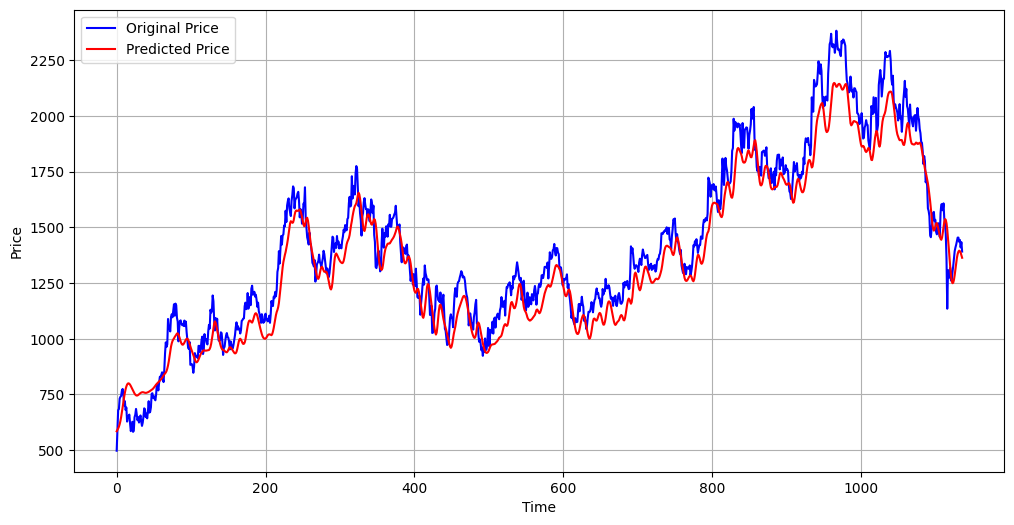

In [44]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [45]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 6.18%


Calculation of R2 score

In [46]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9264815496542885


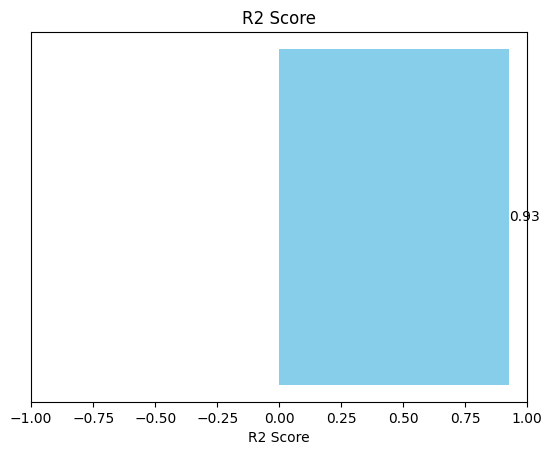

In [47]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

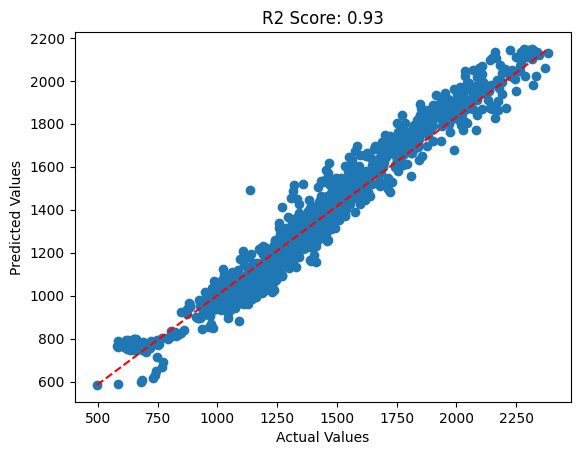

In [48]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()